# Data Visualize Part 2: Preprocessing

---

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

---

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập bằng Selenium là file "data.csv" đính kèm; đây là dữ liệu về thông số ca nhiễm Covid19 của Thế giới. Dữ liệu này được lấy từ Dữ liệu thống kê từng ngày ca nhiễm virus Covid-19 từ tổ chức Worldometer, và gốc của dữ liệu là [ở đây](https://www.worldometers.info/).


---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,Unnamed: 0,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,0,USA,"82,192,880","1,014,114","80,052,061","1,126,705","1,559","245,753","3,032","993,285,213","2,969,875",North America,"334,453,530",4,330,0.0
1,1,India,"43,039,023","521,767","42,506,228","11,028",698,"30,652",372,"794,525,202","565,851",Asia,"1,404,124,784",33,"2,691",2.0
2,2,France,"27,310,055","143,777","24,492,534","2,673,744","1,541","416,755","2,194","260,504,402","3,975,327",Europe,"65,530,304",2,456,0.0
3,3,UK,"21,715,116","171,045","19,973,929","1,570,142",385,"316,916","2,496","511,698,520","7,467,868",Europe,"68,520,023",3,401,0.0
4,4,S. Korea,"15,979,061","20,352",NaN,NaN,962,"311,194",396,"15,804,065","307,786",Asia,"51,347,631",3,"2,523",3.0


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = data_df.shape[0]
num_cols = data_df.shape[1]
print(num_rows, num_cols)

342 16


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của "Covid19" và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin của thông số ca nhiễm. Có vẻ không có dòng nào bị "lạc loài".

Ta thấy ở cột ``Unnamed: 0`` chỉ là index của file ``data.csv`` không có tác dụng trong việc Visualize nên ta sẽ bỏ cột này.

In [4]:
data_df = data_df.drop('Unnamed: 0', axis = 1)
data_df.reset_index()
data_df

,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,USA,"82,192,880","1,014,114","80,052,061","1,126,705","1,559","245,753","3,032","993,285,213","2,969,875",North America,"334,453,530",4,330,0.0
1,India,"43,039,023","521,767","42,506,228","11,028",698,"30,652",372,"794,525,202","565,851",Asia,"1,404,124,784",33,"2,691",2.0
2,France,"27,310,055","143,777","24,492,534","2,673,744","1,541","416,755","2,194","260,504,402","3,975,327",Europe,"65,530,304",2,456,0.0
3,UK,"21,715,116","171,045","19,973,929","1,570,142",385,"316,916","2,496","511,698,520","7,467,868",Europe,"68,520,023",3,401,0.0
4,S. Korea,"15,979,061","20,352",NaN,NaN,962,"311,194",396,"15,804,065","307,786",Asia,"51,347,631",3,"2,523",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Falkland Islands,128,,NaN,NaN,NaN,"34,973",NaN,"8,632","2,358,470",South America,"3,660",29,NaN,0.0
338,Vatican City,29,,29,0,NaN,"36,025",NaN,NaN,NaN,Europe,805,28,NaN,NaN
339,MS Zaandam,9,2,7,0,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
340,Niue,7,,7,0,NaN,"4,253",NaN,NaN,NaN,Australia/Oceania,"1,646",235,NaN,NaN


### Dữ liệu có bị thiếu không?

In [5]:
data_df.isnull().sum()

Country                  0
Total Cases              0
Total Death              0
Total Recovered         21
Active Cases            21
Serious Critical       108
Tot cases/1M pop         3
Deaths/1M pop           18
Total tests             24
Tests/ 1M pop           24
region                   3
population               0
1 Case every X ppl       3
1 death every X ppl     18
1 Test every X ppl      24
dtype: int64

Như ta đã thấy dữ liệu bị thiếu đều nằm ở các cột có dạng **số**, do dữ liệu này ta chỉ mới đọc lên, **chưa xác định được kiểu dữ liệu của từng cột** nên ta sẽ xử lý các "missing value" này sau khi ta đã xác định rõ kiểu dữ liệu của từng cột.

### Dữ liệu có các dòng bị lặp không?

In [6]:
if (data_df.duplicated().any() == True):
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
have_duplicated_rows

True

Ở kết quả trên là "True" tức là có các dòng bị lặp, ta không muốn dữ liệu của mình bị lệch quá nhiều dẫn đến Visualize không đúng, ta sẽ xoá các dòng dữ liệu bị lặp đó đi.

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dataset "Covid19 Cases" về các cột trong file "data.csv":
- **Country**: Tên quốc gia.
- **Total Cases**: Tổng số ca nhiễm.
- **Total Death**: Tổng số ca tử vong.
- **Total Recovered**: Tổng số ca phục hồi.
- **Active Cases**: Số ca dương tính.
- **Serious Critical**: Ca diễn biến nặng
- **Tot cases/1M pop**: Tổng số ca tính trên 1 triệu dân số
- **Deaths/1M pop**: Tổng số ca chết trên 1 triệu dân số
- **Total tests**: Tổng số lần Test
- **Tests/ 1M pop**: Số lần test trên 1 triệu dân số
- **region**: Khu vực
- **population**: Dân số
- **1 Case every X ppl**: 1 ca trong dân số
- **1 death every X ppl**: 1 ca tử vong trong dân số
- **1 Test every X ppl**: 1 test trong dân số


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

In [7]:
col_dtypes = data_df.dtypes
col_dtypes

Country                 object
Total Cases             object
Total Death             object
Total Recovered         object
Active Cases            object
Serious Critical        object
Tot cases/1M pop        object
Deaths/1M pop           object
Total tests             object
Tests/ 1M pop           object
region                  object
population              object
1 Case every X ppl      object
1 death every X ppl     object
1 Test every X ppl     float64
dtype: object

In [8]:
# XỬ lý
def open_object_dtype(s):
    dtypes = set()
    
    dtypes = set((s.apply(value_type)))
    
    return dtypes

def value_type(value):
    return (type(value))

In [9]:
print('Country=', open_object_dtype(data_df['Country']))
print('Total Death=', open_object_dtype(data_df['Total Death']))
print('Total Recovered=', open_object_dtype(data_df['Total Recovered']))
print('Total Cases=', open_object_dtype(data_df['Total Cases']))
print('Active Cases=', open_object_dtype(data_df['Active Cases']))
print('Serious Critical=', open_object_dtype(data_df['Serious Critical']))
print('Tot cases/1M pop=', open_object_dtype(data_df['Tot cases/1M pop']))
print('Deaths/1M pop=', open_object_dtype(data_df['Deaths/1M pop']))
print('Total tests=', open_object_dtype(data_df['Total tests']))
print('Tests/ 1M pop=', open_object_dtype(data_df['Tests/ 1M pop']))
print('region=', open_object_dtype(data_df['region']))
print('population=', open_object_dtype(data_df['population']))
print('1 Case every X ppl=', open_object_dtype(data_df['1 Case every X ppl']))
print('1 death every X ppl=', open_object_dtype(data_df['1 death every X ppl']))

Country= {<class 'str'>}
Total Death= {<class 'str'>}
Total Recovered= {<class 'str'>, <class 'float'>}
Total Cases= {<class 'str'>}
Active Cases= {<class 'str'>, <class 'float'>}
Serious Critical= {<class 'str'>, <class 'float'>}
Tot cases/1M pop= {<class 'str'>, <class 'float'>}
Deaths/1M pop= {<class 'str'>, <class 'float'>}
Total tests= {<class 'str'>, <class 'float'>}
Tests/ 1M pop= {<class 'str'>, <class 'float'>}
region= {<class 'str'>, <class 'float'>}
population= {<class 'str'>}
1 Case every X ppl= {<class 'str'>, <class 'float'>}
1 death every X ppl= {<class 'str'>, <class 'float'>}


Nhận xét:
- Các cột dạng số nhưng lại có thêm kiểu ``str`` do có giá trị nan, ta sẽ chuyển kiểu dữ liệu sang ``float64``
- Các cột dạng định danh ta cần chuyển chúng sang kiểu sữ liệu ``str``

## Tiền xử lý

### Xác định kiểu dữ liệu của từng cột:

1. Với 2 cột dạng Categorical là ``Country`` và ``region`` ta sẽ chuyển kiểu dữ liệu của 2 cột này sang dạng `str`
    

In [10]:
# Fill cột Categorical
data_df["region"] = data_df["region"].fillna(data_df["region"].mode()[0])

data_df['Country'] = data_df['Country'].astype('str')
data_df['region'] = data_df['region'].astype('str')
data_df.dtypes

Country                 object
Total Cases             object
Total Death             object
Total Recovered         object
Active Cases            object
Serious Critical        object
Tot cases/1M pop        object
Deaths/1M pop           object
Total tests             object
Tests/ 1M pop           object
region                  object
population              object
1 Case every X ppl      object
1 death every X ppl     object
1 Test every X ppl     float64
dtype: object

2. Với các cột còn lại là dạng Numeric, ta sẽ chuyển chúng sang dạng ``float64``:

Do các cột dạng Numberic này có số phần nghìn, phần trăm cách nhau bởi **dấu phẩy** nên pandas sẽ không nhận diện được kiểu dữ liệu số nên ta sẽ remove chúng. Ta cần lưu ý là với các dữ liệu là '' thì sẽ không thể thay đổi kiểu dữ liệu được nên ta sẽ replace chúng bằng giá trị NaN của numpy trước.


In [11]:
data_df_cp = data_df.copy()
data_df_cp = data_df_cp.replace(" ", np.nan)

def delete_comma(string):
    if (isinstance(string, str) and ',' in string):
        return string.replace(",", "")
    else:
        return string
    
data_df_cp["Total Cases"] = data_df_cp["Total Cases"].apply(delete_comma).astype(float)
data_df_cp["Total Death"] = data_df_cp["Total Death"].apply(delete_comma).astype(float)
data_df_cp["Total Recovered"] = data_df_cp["Total Recovered"].apply(delete_comma).astype(float)
data_df_cp["Active Cases"] = data_df_cp["Active Cases"].apply(delete_comma).astype(float)
data_df_cp["Serious Critical"] = data_df_cp["Serious Critical"].apply(delete_comma).astype(float)
data_df_cp["Tot cases/1M pop"] = data_df_cp["Tot cases/1M pop"].apply(delete_comma).astype(float)
data_df_cp["Deaths/1M pop"] = data_df_cp["Deaths/1M pop"].apply(delete_comma).astype(float)
data_df_cp["Total tests"] = data_df_cp["Total tests"].apply(delete_comma).astype(float)
data_df_cp["Tests/ 1M pop"] = data_df_cp["Tests/ 1M pop"].apply(delete_comma).astype(float)
data_df_cp["population"] = data_df_cp["population"].apply(delete_comma).astype(float)
data_df_cp["1 Case every X ppl"] = data_df_cp["1 Case every X ppl"].apply(delete_comma).astype(float)
data_df_cp["1 death every X ppl"] = data_df_cp["1 death every X ppl"].apply(delete_comma).astype(float)

data_df = data_df_cp
data_df

,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,USA,82192880.0,1014114.0,80052061.0,1126705.0,1559.0,245753.0,3032.0,993285213.0,2969875.0,North America,3.344535e+08,4.0,330.0,0.0
1,India,43039023.0,521767.0,42506228.0,11028.0,698.0,30652.0,372.0,794525202.0,565851.0,Asia,1.404125e+09,33.0,2691.0,2.0
2,France,27310055.0,143777.0,24492534.0,2673744.0,1541.0,416755.0,2194.0,260504402.0,3975327.0,Europe,6.553030e+07,2.0,456.0,0.0
3,UK,21715116.0,171045.0,19973929.0,1570142.0,385.0,316916.0,2496.0,511698520.0,7467868.0,Europe,6.852002e+07,3.0,401.0,0.0
4,S. Korea,15979061.0,20352.0,NaN,NaN,962.0,311194.0,396.0,15804065.0,307786.0,Asia,5.134763e+07,3.0,2523.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Falkland Islands,128.0,NaN,NaN,NaN,NaN,34973.0,NaN,8632.0,2358470.0,South America,3.660000e+03,29.0,NaN,0.0
338,Vatican City,29.0,NaN,29.0,0.0,NaN,36025.0,NaN,NaN,NaN,Europe,8.050000e+02,28.0,NaN,NaN
339,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
340,Niue,7.0,NaN,7.0,0.0,NaN,4253.0,NaN,NaN,NaN,Australia/Oceania,1.646000e+03,235.0,NaN,NaN


### Xử lý dữ liệu có chứa NaN:

Như ở trên, 
- Cột dạng Categorical là ``region`` có 3  missing value, ta sẽ thay bằng **Trung vị (mode)**
- Ta sẽ xử lý missing value ở các cột dạng Numeric (trừ cột ``Total Cases`` do không có missing value) bằng cách thay thế chúng bằng giá trị **trung bình (mean) của cột đó**.

In [12]:
data_df_cp = data_df.copy()
'''
# Fill cột Numeric
data_df_cp["Total Death"] = data_df_cp["Total Death"].fillna(data_df_cp["Total Death"].mean())
data_df_cp["Total Recovered"] = data_df_cp["Total Recovered"].fillna(data_df_cp["Total Recovered"].mean())
data_df_cp["Active Cases"] = data_df_cp["Active Cases"].fillna(data_df_cp["Active Cases"].mean())
data_df_cp["Serious Critical"] = data_df_cp["Serious Critical"].fillna(data_df_cp["Serious Critical"].mean())
data_df_cp["Tot cases/1M pop"] = data_df_cp["Tot cases/1M pop"].fillna(data_df_cp["Tot cases/1M pop"].mean())
data_df_cp["Deaths/1M pop"] = data_df_cp["Deaths/1M pop"].fillna(data_df_cp["Deaths/1M pop"].mean())
data_df_cp["Total tests"] = data_df_cp["Total tests"].fillna(data_df_cp["Total Death"].mean())
data_df_cp["Tests/ 1M pop"] = data_df_cp["Tests/ 1M pop"].fillna(data_df_cp["Tests/ 1M pop"].mean())
data_df_cp["population"] = data_df_cp["population"].fillna(data_df_cp["population"].mean())
data_df_cp["1 Case every X ppl"] = data_df_cp["1 Case every X ppl"].fillna(data_df_cp["1 Case every X ppl"].mean())
data_df_cp["1 death every X ppl"] = data_df_cp["1 death every X ppl"].fillna(data_df_cp["1 death every X ppl"].mean())
data_df_cp["1 Test every X ppl"] = data_df_cp["1 Test every X ppl"].fillna(data_df_cp["1 Test every X ppl"].mean())
'''

'\n# Fill cột Numeric\ndata_df_cp["Total Death"] = data_df_cp["Total Death"].fillna(data_df_cp["Total Death"].mean())\ndata_df_cp["Total Recovered"] = data_df_cp["Total Recovered"].fillna(data_df_cp["Total Recovered"].mean())\ndata_df_cp["Active Cases"] = data_df_cp["Active Cases"].fillna(data_df_cp["Active Cases"].mean())\ndata_df_cp["Serious Critical"] = data_df_cp["Serious Critical"].fillna(data_df_cp["Serious Critical"].mean())\ndata_df_cp["Tot cases/1M pop"] = data_df_cp["Tot cases/1M pop"].fillna(data_df_cp["Tot cases/1M pop"].mean())\ndata_df_cp["Deaths/1M pop"] = data_df_cp["Deaths/1M pop"].fillna(data_df_cp["Deaths/1M pop"].mean())\ndata_df_cp["Total tests"] = data_df_cp["Total tests"].fillna(data_df_cp["Total Death"].mean())\ndata_df_cp["Tests/ 1M pop"] = data_df_cp["Tests/ 1M pop"].fillna(data_df_cp["Tests/ 1M pop"].mean())\ndata_df_cp["population"] = data_df_cp["population"].fillna(data_df_cp["population"].mean())\ndata_df_cp["1 Case every X ppl"] = data_df_cp["1 Case every

Đến đây, ta bắt đầu xét Logic giá trị của cột, ta thấy các cột thường đếm số ca nên sẽ có kiểu dữ liệu int.

In [13]:
'''data_df_cp["Total Cases"] = data_df_cp["Total Cases"].astype(int)
data_df_cp["Total Death"] = data_df_cp["Total Death"].astype(int)
data_df_cp["Total Recovered"] = data_df_cp["Total Recovered"].astype(int)
data_df_cp["Active Cases"] = data_df_cp["Active Cases"].astype(int)
data_df_cp["Serious Critical"] = data_df_cp["Serious Critical"].astype(int)
data_df_cp["Tot cases/1M pop"] = data_df_cp["Tot cases/1M pop"].astype(int)
data_df_cp["Deaths/1M pop"] = data_df_cp["Deaths/1M pop"].astype(int)
data_df_cp["Total tests"] = data_df_cp["Total tests"].astype(int)
data_df_cp["Tests/ 1M pop"] = data_df_cp["Tests/ 1M pop"].astype(int)
data_df_cp["population"] = data_df_cp["population"].astype(int)
data_df_cp["1 Case every X ppl"] = data_df_cp["1 Case every X ppl"].astype(int)
data_df_cp["1 death every X ppl"] = data_df_cp["1 death every X ppl"].astype(int)
data_df_cp["1 Test every X ppl"] = data_df_cp["1 Test every X ppl"].astype(int)'''

#data_df = data_df_cp
data_df.to_csv("data_preprocessing.csv", index = False)
data_df

,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,USA,82192880.0,1014114.0,80052061.0,1126705.0,1559.0,245753.0,3032.0,993285213.0,2969875.0,North America,3.344535e+08,4.0,330.0,0.0
1,India,43039023.0,521767.0,42506228.0,11028.0,698.0,30652.0,372.0,794525202.0,565851.0,Asia,1.404125e+09,33.0,2691.0,2.0
2,France,27310055.0,143777.0,24492534.0,2673744.0,1541.0,416755.0,2194.0,260504402.0,3975327.0,Europe,6.553030e+07,2.0,456.0,0.0
3,UK,21715116.0,171045.0,19973929.0,1570142.0,385.0,316916.0,2496.0,511698520.0,7467868.0,Europe,6.852002e+07,3.0,401.0,0.0
4,S. Korea,15979061.0,20352.0,NaN,NaN,962.0,311194.0,396.0,15804065.0,307786.0,Asia,5.134763e+07,3.0,2523.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Falkland Islands,128.0,NaN,NaN,NaN,NaN,34973.0,NaN,8632.0,2358470.0,South America,3.660000e+03,29.0,NaN,0.0
338,Vatican City,29.0,NaN,29.0,0.0,NaN,36025.0,NaN,NaN,NaN,Europe,8.050000e+02,28.0,NaN,NaN
339,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
340,Niue,7.0,NaN,7.0,0.0,NaN,4253.0,NaN,NaN,NaN,Australia/Oceania,1.646000e+03,235.0,NaN,NaN


## Khai phá dữ liệu

Sau khi tiền xử lý, ta đã lưu những thay đổi vào file "data_preprocessing.csv", ta s4 đọc nó lên khám phá bộ dữ liệu này.

In [14]:
data_df = pd.read_csv("data_preprocessing.csv")
data_df.head(6)

,Country,Total Cases,Total Death,Total Recovered,Active Cases,Serious Critical,Tot cases/1M pop,Deaths/1M pop,Total tests,Tests/ 1M pop,region,population,1 Case every X ppl,1 death every X ppl,1 Test every X ppl
0,USA,82192880.0,1014114.0,80052061.0,1126705.0,1559.0,245753.0,3032.0,993285213.0,2969875.0,North America,3.344535e+08,4.0,330.0,0.0
1,India,43039023.0,521767.0,42506228.0,11028.0,698.0,30652.0,372.0,794525202.0,565851.0,Asia,1.404125e+09,33.0,2691.0,2.0
2,France,27310055.0,143777.0,24492534.0,2673744.0,1541.0,416755.0,2194.0,260504402.0,3975327.0,Europe,6.553030e+07,2.0,456.0,0.0
3,UK,21715116.0,171045.0,19973929.0,1570142.0,385.0,316916.0,2496.0,511698520.0,7467868.0,Europe,6.852002e+07,3.0,401.0,0.0
4,S. Korea,15979061.0,20352.0,NaN,NaN,962.0,311194.0,396.0,15804065.0,307786.0,Asia,5.134763e+07,3.0,2523.0,3.0
5,Turkey,14978031.0,98493.0,14688473.0,191065.0,975.0,174260.0,1146.0,156514251.0,1820940.0,Asia,8.595243e+07,6.0,873.0,1.0


Như đã mô tả chi tiết ở trên, dữ liệu ta đang thu thập về **Covid - 19 ở nhiều quốc gia** về số ca nhiễm bệnh, số ca tử vong,... Ta sẽ đặt câu hỏi cần trả lời để làm rõ dữ liệu này.

### Quốc gia (Country) nào có số ca nhiễm nằm trong top 15?

Do trong bộ dữ liệu này có những dòng 1 nước xuất hiện 2, 3 lần, đó là do sau 12h dữ liệu sẽ được cập nhật. Ta sẽ lấy dữ liệu được cập nhật cuối cùng trong ngày bằng cách sort giá trị của chúng tăng dần rồi lấy giá trị đầu tiên của top 15 nước có số ca nhiễm nhiều nhất.

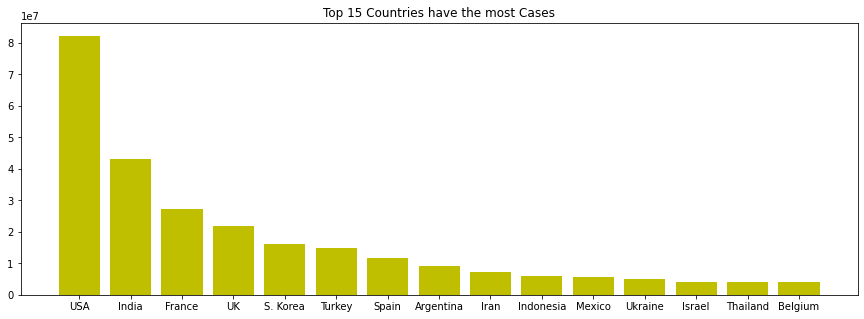

In [15]:
top_cases = data_df[['Country', 'Total Cases']].drop_duplicates(keep = 'first').reset_index(drop = True)
top_cases = top_cases.sort_values(by= 'Total Cases', ascending = False)
top_cases.drop_duplicates(subset = 'Country', keep = 'first', inplace = True)
top_15_cases = top_cases[:15]

plt.figure(figsize =(15, 5))
plt.bar(top_15_cases['Country'], top_15_cases['Total Cases'], color = 'y')
plt.title('Top 15 Countries have the most Cases')
plt.show()

Nhận xét: Ta thấy rằng ở nước USA (Mỹ) và India (Ấn Độ) có số ca nhiễm rất "khủng". Không biết nguyên nhân là do đâu nhỉ? Ta thử xem xét dân số của 15 nước này để phân tích thêm.

### Quốc gia (Country) có số ca nhiễm nằm trong top 15 có dân số như thế nào?

Đầu tiên, ta sẽ tìm tên top 15 quốc gia này. Sau đó tìm đến dân số của các nước ấy và trựa quan hoá lên.

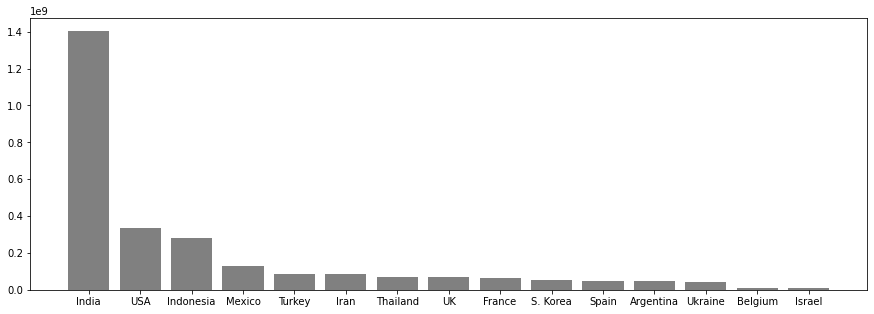

In [16]:
top_name = top_15_cases["Country"]

df_top_name = data_df[data_df['Country'].isin(top_name)]

df_population = df_top_name[['Country', 'population']].sort_values(by = 'population', ascending = False)
df_population.drop_duplicates(subset = 'Country')

plt.figure(figsize =(15, 5))
plt.bar(df_population["Country"], df_population["population"], color = 'gray')
plt.show()

Nhận xét:
- Ở các nước có số ca nhiễm thấp có dân số nhiều hơn số ca nhiễm thực.
- Có một sự khác biệt giữa số ca nhiễm và dân số giữa 2 nước đông dân là **India** và **USA**:
    + **India** đông dân hơn **USA**.
    + **USA** có số ca nhiễm nhiều hơn rất nhiều so với số ca nhiễm của **India**.
- => Cho thấy công tác phòng chống dịch của **India** có hiệu quả hơn so với **USA**, ở các nước còn lại thì khá bình thường, công tác phòng dịch có hiệu quả

### Các quốc gia có tỉ lệ tử vong cao hay thấp với với tỉ lệ khỏi bệnh như thế nào?

Để đánh giá chất lượng y tế cũng như công tác phòng dịch bệnh của chính phủ và địa phương, ta sẽ quan tâm đến tỉ lệ tử vong có cao hay không ở các nước.

> Do dữ liệu có rất nhiều nước, nên ta sẽ chỉ lấy 15 quốc gia có tỉ lệ tử vong và tỉ lệ hồi phục cao nhất trên số Cases.

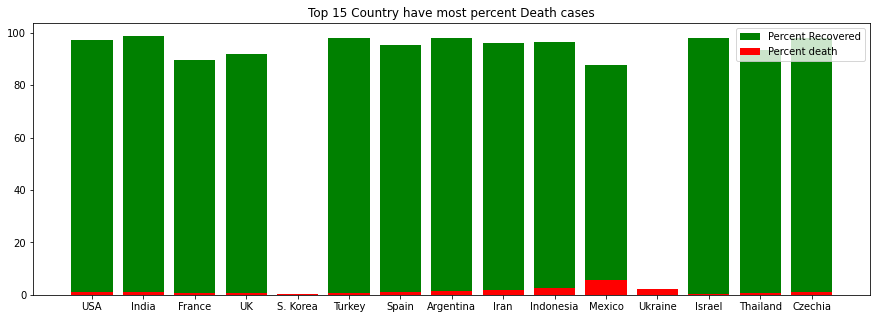

In [17]:
data_cases_death = data_df[['Country', 'Total Cases', 'Total Death', 'Total Recovered']].drop_duplicates(keep = 'first').reset_index(drop = True)
data_cases_death["Percent death"] = (data_cases_death['Total Death'] / data_cases_death['Total Cases']) * 100
data_cases_death["Percent recovered"] = (data_cases_death['Total Recovered'] / data_cases_death['Total Cases']) * 100
percent_death = data_cases_death[data_cases_death['Percent death'] <= 100][['Country', 'Percent death', 'Percent recovered']]

# Lấy ra top 15 tỉ lệ ca tử vong
top_15_percent_death = percent_death[:15]

#Visualize
plt.figure(figsize =(15, 5))

plt.bar(top_15_percent_death['Country'], top_15_percent_death['Percent recovered'], color = 'g', label = 'Percent Recovered')
plt.bar(top_15_percent_death['Country'], top_15_percent_death['Percent death'], color = 'r', label = 'Percent death')

plt.legend(["Percent Recovered", "Percent death"])
plt.title('Top 15 Country have most percent Death cases')
plt.show()

Nhận xét:
- Kết quả Visualize thật bất ngờ, mặc dù dân số đông, số ca nhiễm nhiều nhưng tỉ lệ tử vong của **USA** và **India** rất là thấp, cùng với đó là những nước y tế tiên tiến hàng đầu như **UK**, **Spain**,...
- 2 nước có tỉ lệ tử vong cao nhất nhì là **Indonesia** và **Mexico** phản ánh trình độ y tế cũng như công tác chống dịch bệnh. Điều này hợp lý do tỉ lệ đói nghèo ở 2 nước này tăng rất nhiều trong nhưng năm qua lên đến 44% (số liệu năm 2021), y tế còn lạc hậu, ý thức người dân thấp nên bị ảnh hưởng rất nặng nề bởi dịch bệnh Covid - 19.
- Mặc dù vậy, tỉ lệ hồi phục ở các nước rất cao và khá là đồng đều, ngoại trừ **Korea** và **Ukraine** có số ca nhiễm ít nhưng không có số liệu về số ca hồi phục.

### Tổng số ca nhiễm ở các Châu lục có phân bố đều không?

Ta cần xem xét xem ở các Châu lục có số ca nhiễm như thế nào để ta có thể khoanh vùng lại và lý giải cho việc lây nhiễm mạnh mẽ và có những nơi lây nhiễm rất chậm.


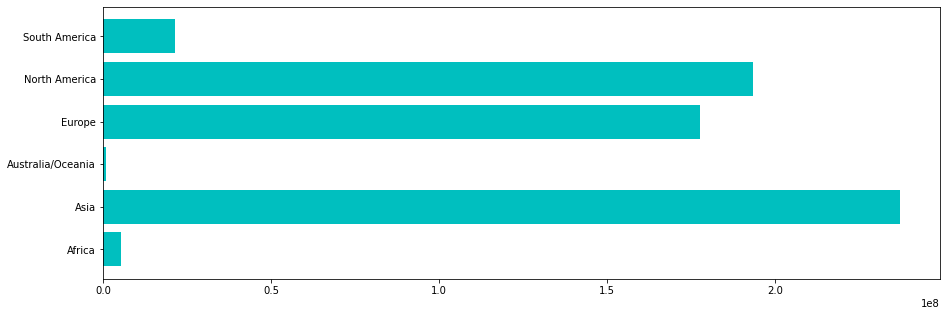

In [18]:
data_drop = data_df[['Country', 'Total Cases', 'region']].drop_duplicates(keep = 'first').reset_index(drop = True)
region_cases = data_drop.groupby('region')["Total Cases"].sum()

# Visualize
plt.figure(figsize =(15, 5))
plt.barh(list(region_cases.keys()), region_cases, color = 'c')
plt.show()

Nhận xét:
- Tổng số ca nhiễm ở Châu Á (Asia) là cao nhất. Đây là số liệu hợp lý vì vào Vũ Hán vào tháng 11 năm 2019 đã xảy ra ca bệnh đầu tiên ở Trung Quốc (China) sau đó lây lan vào các nước Châu Á kề bên.
- Cùng với đó là khu vực Châu Âu (Europe) và Bắc Mỹ (North Ameria) có số ca nhiễm cũng khá cao do các nước nào có sự phát triển mạnh qua giao thương hàng hải, xuất nhập khẩu cũng như là điểm đến giao thương, du lịch được yêu thích và nổi tiếng nhất nên lây lan rất nhanh.
- Ở các Châu Lục còn lại là Châu Úc (Australia), Châu Phi (Africa) và Nam Mỹ (South America) ở quá xa vùng nhiễm mạnh như ở hòn đảo riêng biệt và Châu lục hoang mạc nắng nóng nên ít ca nhiễm hơn so với các Châu lục trên.

### Tỉ lệ phát hiện nhiễm Covid - 19 bằng kit Test có cao không? 

Ta cần biết thông tin này là để tìm hiểu độ hiệu quả của kit Test phát hiện ca dương tính kịp thời hay người dân đợi bệnh chuyển biến nặng rồi mới đi bệnh viện thay vì Test?

Ta sẽ lấy top 15 phần trăm phát hiện ca nhiễm dựa trên kit Test cao nhất

C:\Users\dell\AppData\Local\Temp/ipykernel_16372/1364259918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Test/Case'] = (test_df['Total Cases'] / test_df['Total tests']) * 100


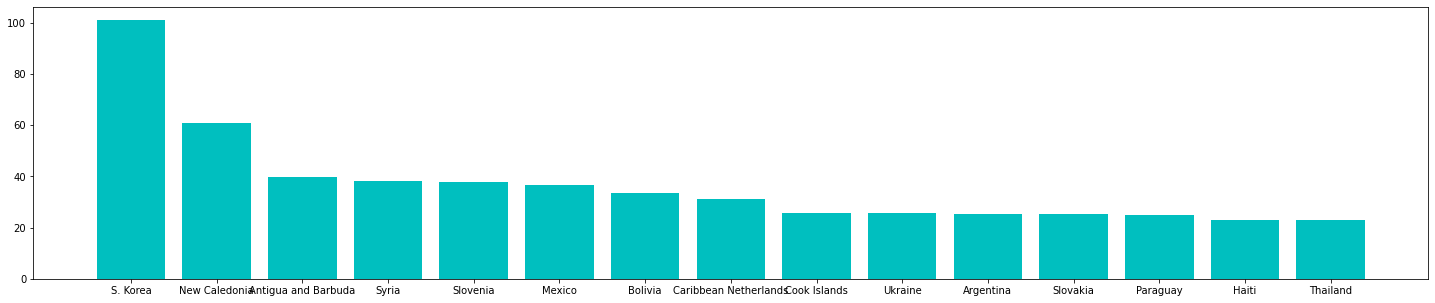

In [20]:
test_df = data_df[['Country', 'Total Cases', 'Total tests']]
test_df['Test/Case'] = (test_df['Total Cases'] / test_df['Total tests']) * 100
test_df = test_df.drop_duplicates(['Country'], keep = 'first')
test_df = test_df.sort_values(by = 'Test/Case', ascending = False)
test_df = test_df[:15]

#Visualize
plt.figure(figsize =(25, 5))
plt.bar(test_df['Country'], test_df['Test/Case'], color = 'c')
plt.show()

Nhận xét:
- Ở biểu đồ trên cho thấy có một số nước có tỉ lệ cao hơn 100%, có lẽ là do các nước không được cung cấp đủ kit test hoặc có những kit test không chất lượng.
- Các nước còn lại bới phần trăm dưới 100 đều là những nước khá nhỏ, có dân số không quá cao nên tỉ lệ khoanh vùng hiệu quả dẫn đến kit test hoạt động khá tốt.